## Experiments in the Friedkin-Johnsen Model of Network Influence
### Moses Boudourides

* Let $G = (V,E)$ be a **graph**  with $n$ nodes, identified as **persons** in the **node**--set $V$, and interacting with each other along the **edge**-set $E$.
* For each node $i \in V$ and each time step $k = 0, 1, 2, \ldots$,  the **opinion** of $i$ at time $k$ is denoted by $x_i^{(k)} \in \mathbb{R}$.
* The opinion of $i$ at time $k$ is updated at the subsequent time step $k + 1$ according to the following iterative scheme of the **Friedkin-Johnsen Social Influence Model**:


$x^{(k + 1)}_i = s_i \, N \, x^{(k)}_i + (1 - s_i) \, x^{(0)}_i$,


* where $N \, x^{(k)}_i$ is the *average* opinion held by $i$'s neighbors at time step $k$ and
* the scalar parameter $s_{i} \in [0, 1]$ is called **susceptibility coefficient** of person/node $i$. 

* When $s_i = 0, i$'s opinion does not change ($x^{(k)}_i = x^{(0)}_i$, for every time iteration $k = 1, 2, \ldots$). Such a person/node is called **persistent**  or **stubborn** in holding the same opinion without being influenced by anybody else.

* When $s_i = 1, i$ is always adopting the average neighbors' opinion $N \, x^{(k)}_i$ without taking into account the initial opinion $x^{(0)}_i$. Such a person/node is called **malleable** or fully **conforming** to the neighbors' influences.

* When $0 < s_i < 1, i$'s opinion is interpolated in between the average neighbors' opinion $N \, x^{(k)}_i$ and the initial opinion $x^{(0)}_i$, in such a way that the exact position of the resulting $i$'s opinion is weighted as a convex combination  through $s_i$.

In [1]:
from sinfluence import influence_sim,infdif_sim,polinfluence_sim,cl_influence_sim

In [2]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
# Karate Club graph
G=nx.karate_club_graph()

# # Connected Erdos-Renyi random graph
# nodes = 25
# p = 0.1 #0.2
# while  True:
#     # G=nx.connected_watts_strogatz_graph(25, 2, 0.8, tries=100)
#     G=nx.erdos_renyi_graph(nodes,p)
#     if nx.is_connected(G):
#         break
# G.remove_nodes_from(nx.isolates(G))

pos=graphviz_layout(G) #nx.spring_layout(G)

In [4]:
# Set the number of iterations (avoid to exceed 100: it will be too slow)

iterations = 20

/Users/mosesboudourides/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


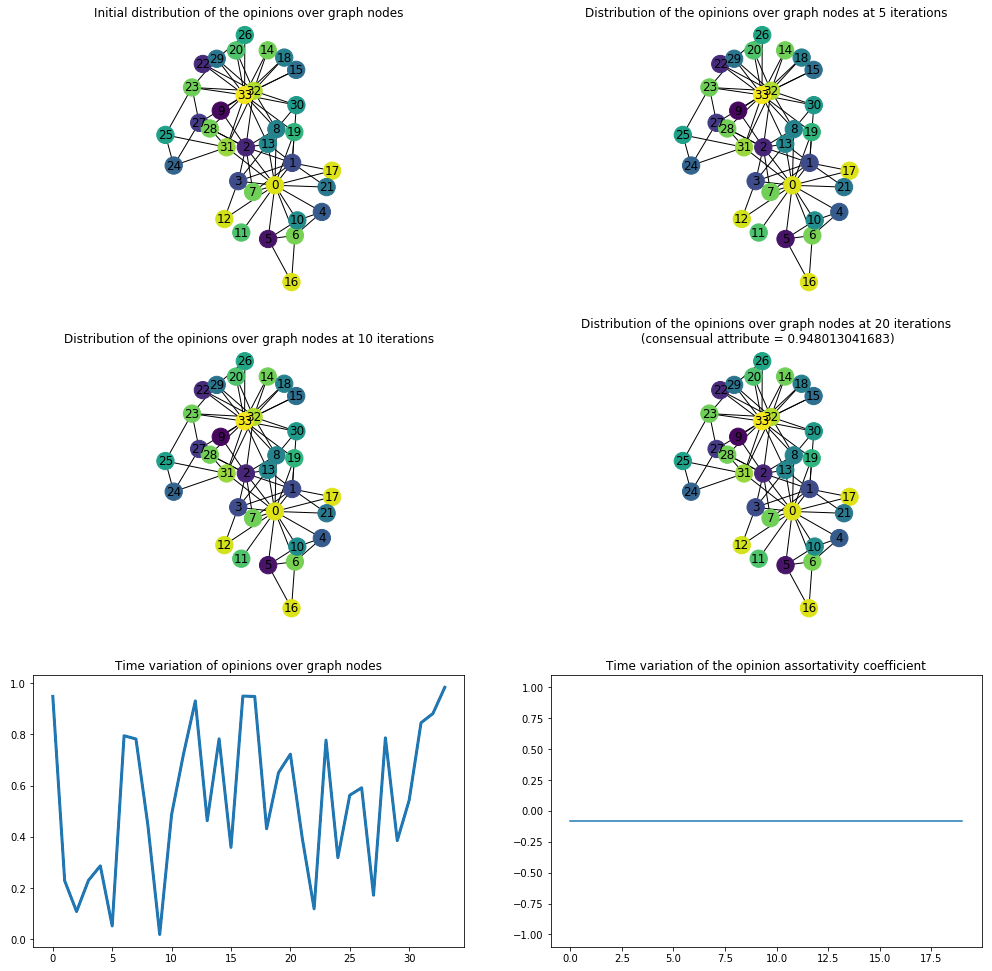

In [5]:
sa=0.
G=G
pos=pos
influence_sim(G,pos,sa,iterations) #nodes,p,

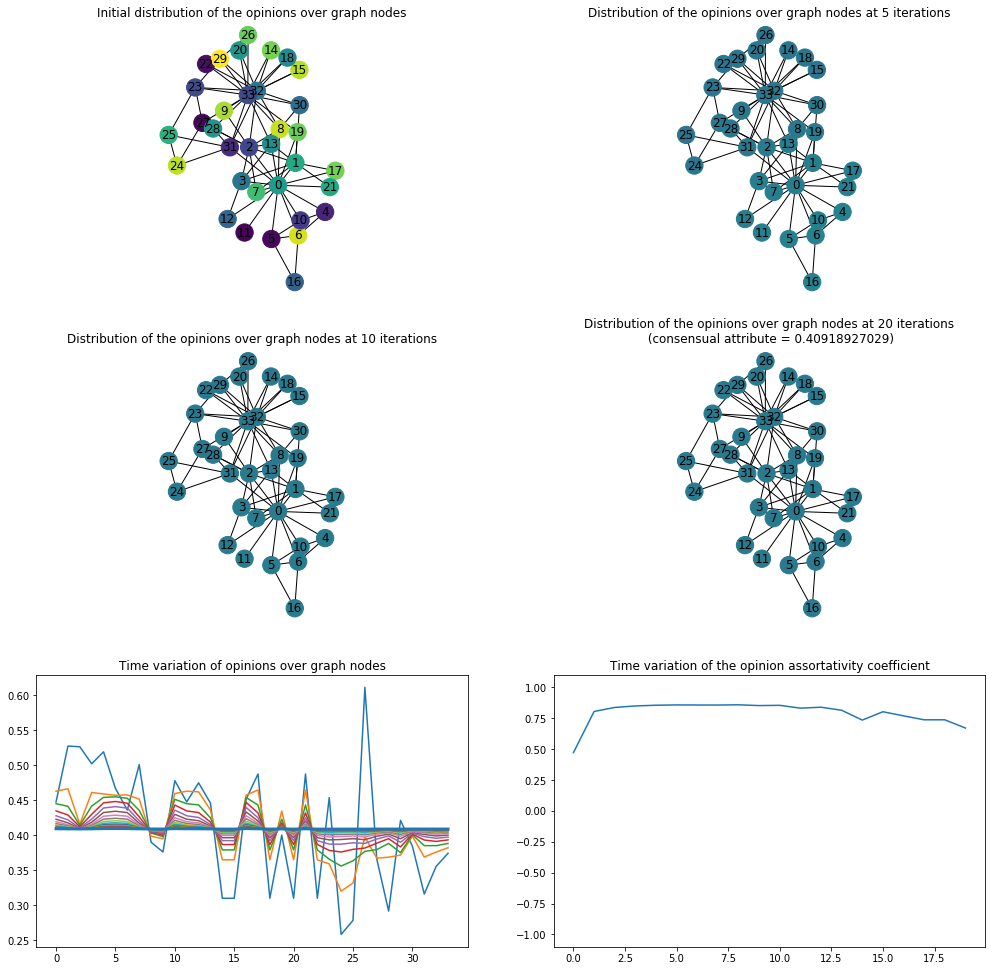

In [6]:
sa=1.
G=G
pos=pos
influence_sim(G,pos,sa,iterations)

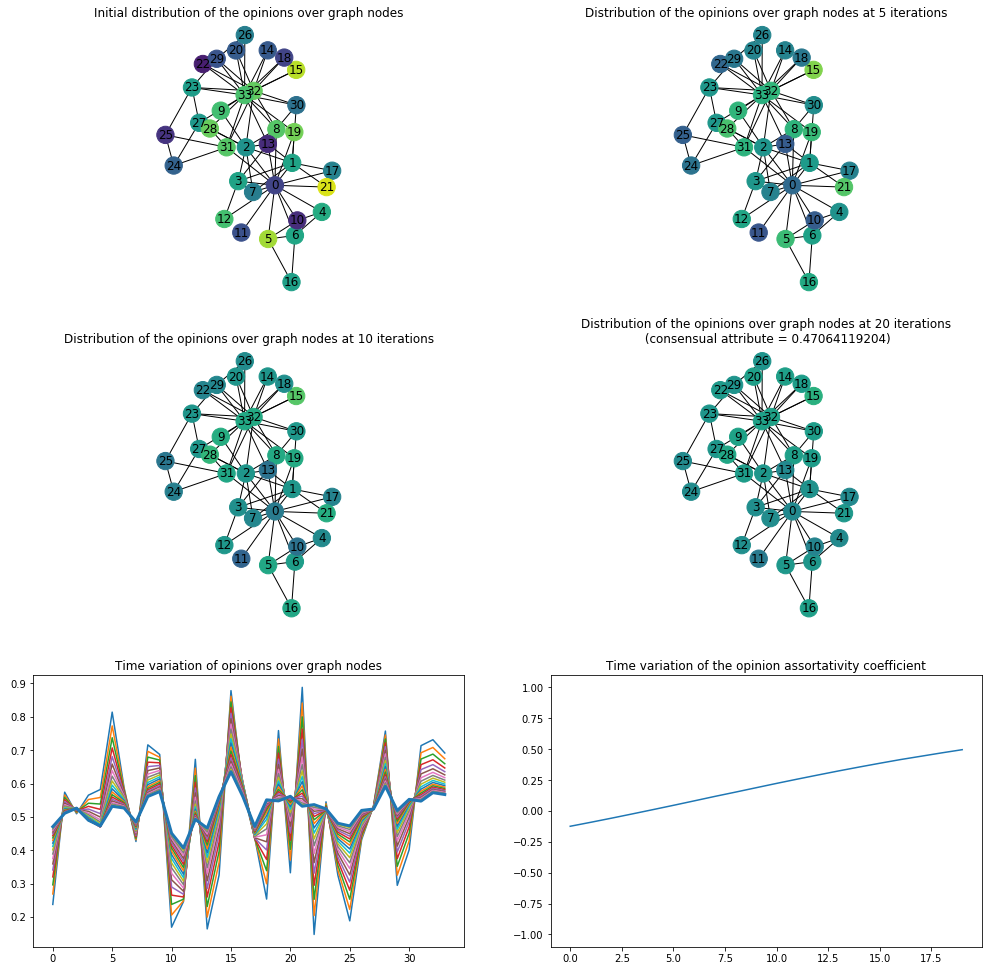

In [7]:
# Experiment B1: INFLUENCE 

# Susceptibility of all nodes (low)
sa = 0.1
G=G
pos=pos
influence_sim(G,pos,sa,iterations)

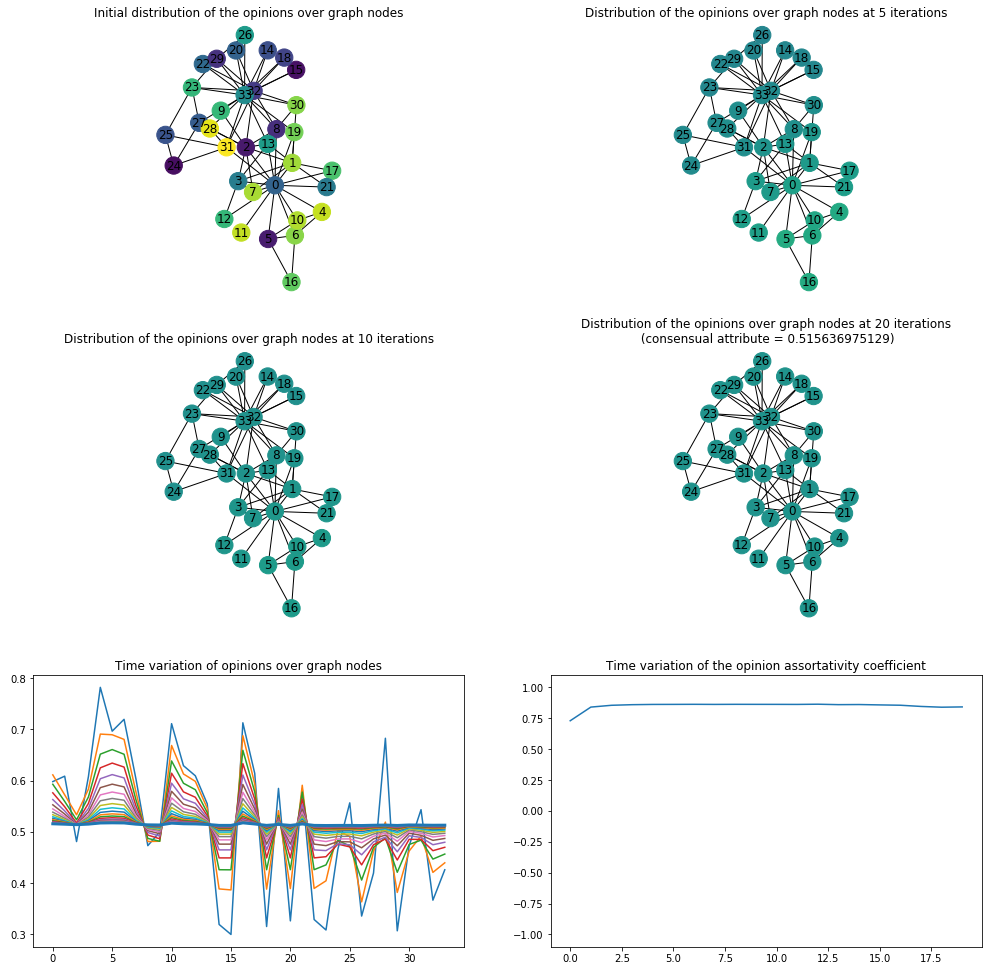

In [8]:
# Experiment B2: INFLUENCE 

# Susceptibility of all nodes (high)
sa = 0.9
G=G
pos=pos
influence_sim(G,pos,sa,iterations)

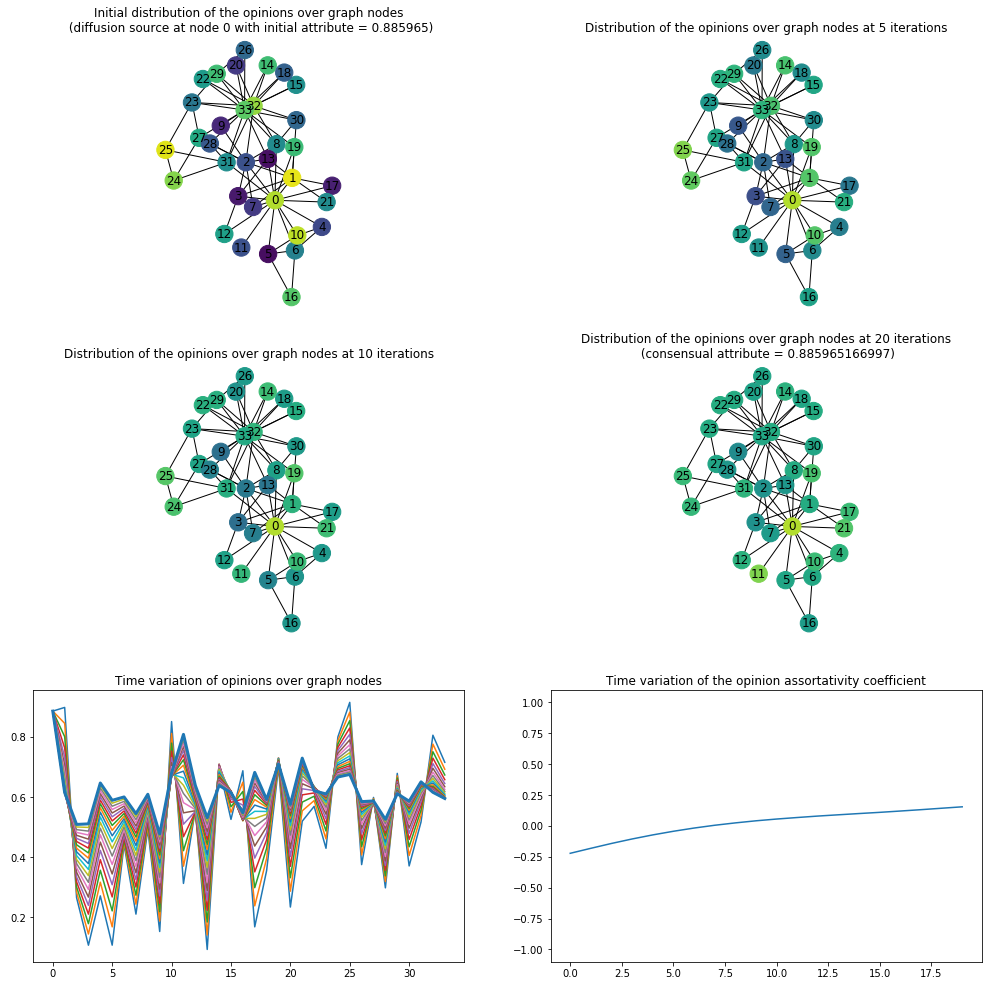

In [9]:
# Experiment B3: INFLUENCE 
# DIFFUSION BY INFLUENCE with heterogeneous susceptibilities

# Susceptibility of node 0 (the lowest)
sa = 0.
# Susceptibility of all other nodes (very low)
sb = 0.1
G=G
pos=pos
infdif_sim(G,pos,sa,sb,iterations)

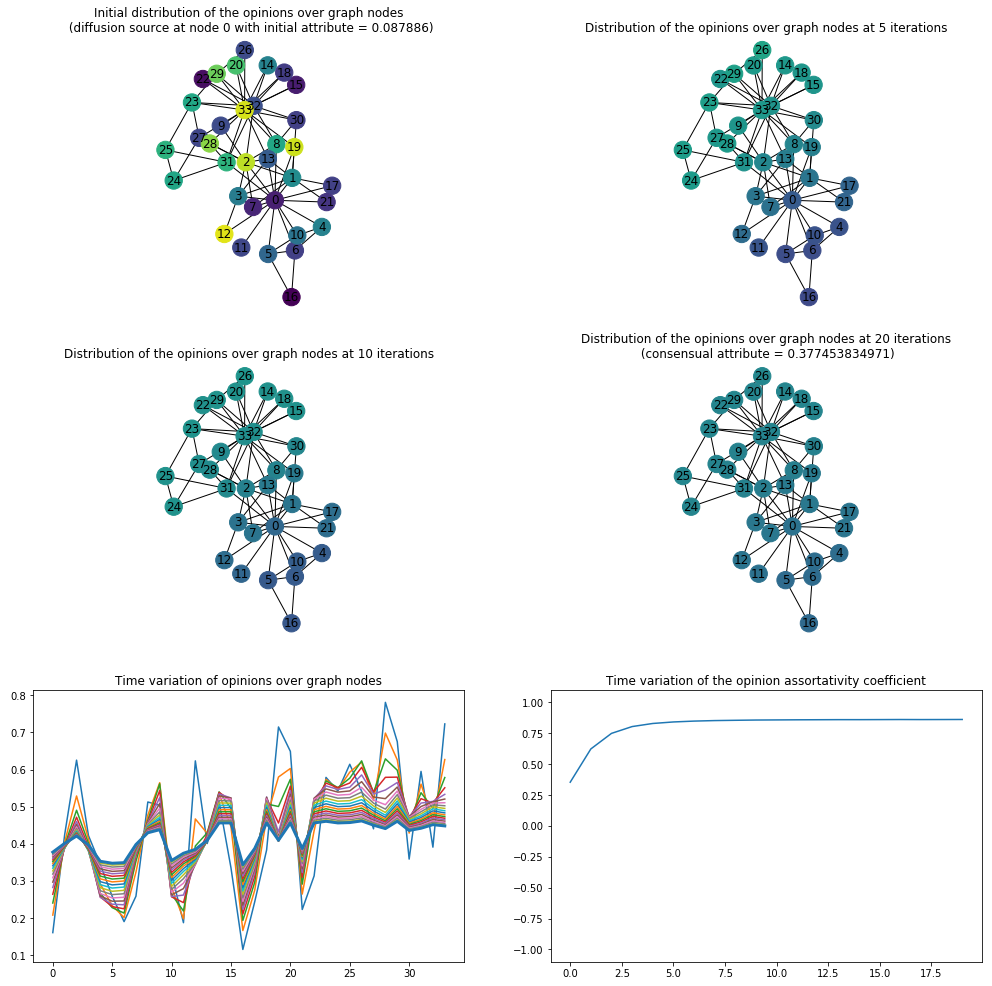

In [10]:
# Experiment B4: INFLUENCE 
# DIFFUSION BY INFLUENCE with heterogeneous susceptibilities

# Susceptibility of node 0 (low)
sa = 0.2
# Susceptibility of all other nodes (medium)
sb = 0.5
G=G
pos=pos
infdif_sim(G,pos,sa,sb,iterations)

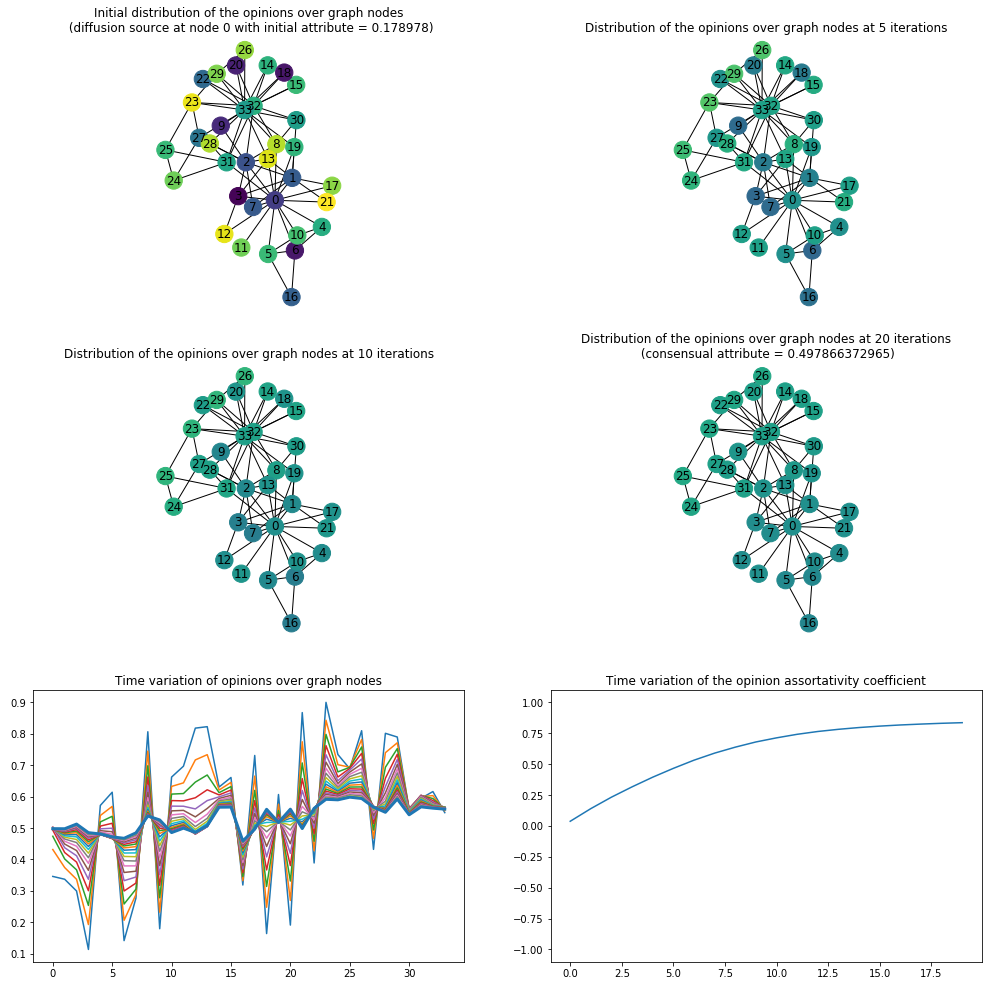

In [11]:
# Experiment B5: INFLUENCE 
# DIFFUSION BY INFLUENCE with heterogeneous susceptibilities

# Susceptibility of node 0 (medium)
sa = 0.4
# Susceptibility of all other nodes (low)
sb = 0.2
G=G
pos=pos
infdif_sim(G,pos,sa,sb,iterations)

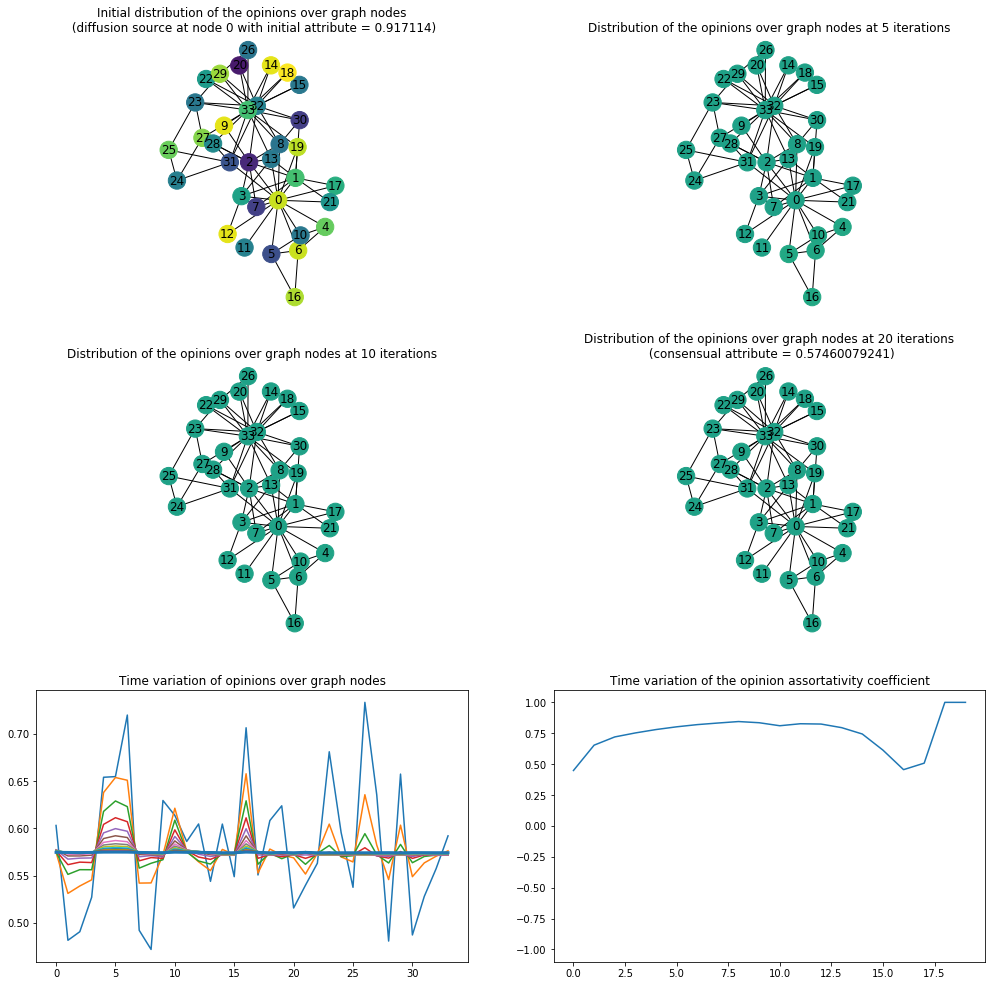

In [12]:
# Experiment B6: INFLUENCE 
# DIFFUSION BY INFLUENCE with heterogeneous susceptibilities

# Susceptibility of node 0 (high)
sa = 0.8
# Susceptibility of all other nodes (higher)
sb = 0.9
G=G
pos=pos
infdif_sim(G,pos,sa,sb,iterations)

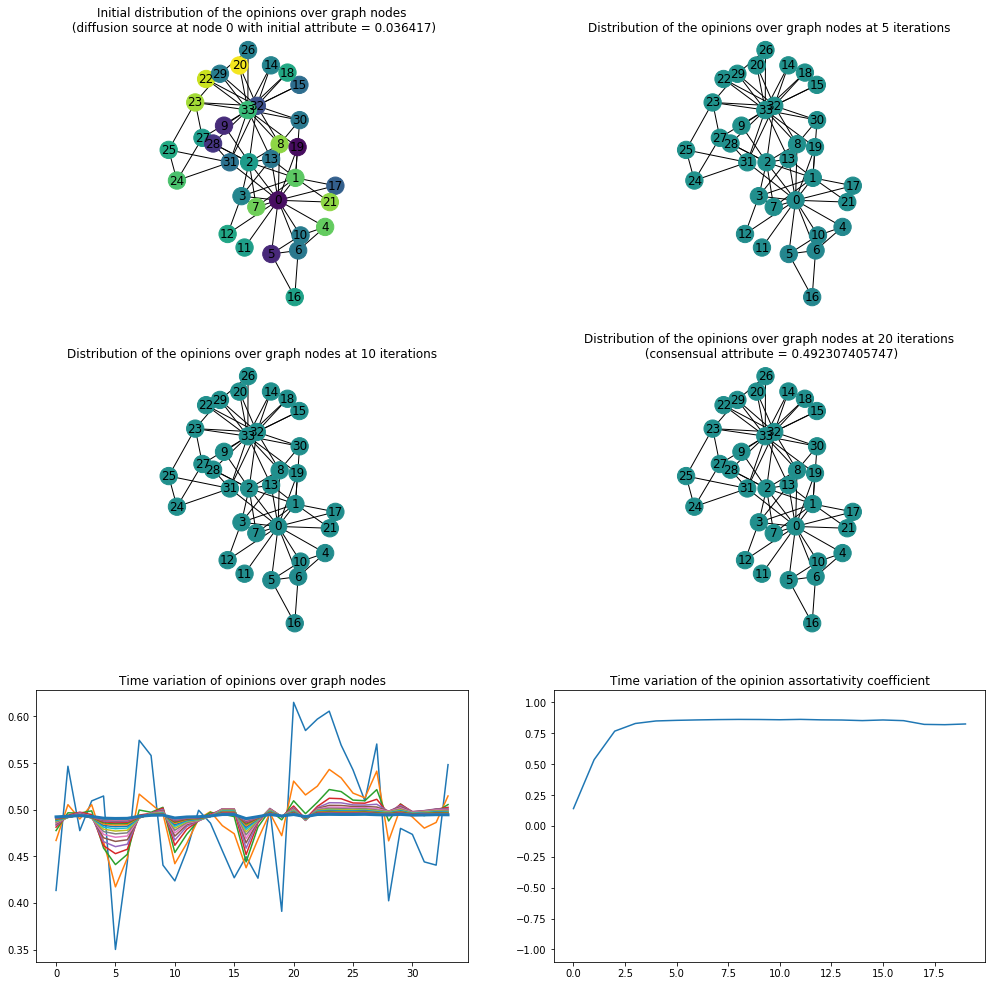

In [13]:
# Experiment B7: INFLUENCE 
# DIFFUSION BY INFLUENCE with heterogeneous susceptibilities

# Susceptibility of node 0 (high)
sa = 0.8
# Susceptibility of all other nodes (less high)
sb = 0.7
G=G
pos=pos
infdif_sim(G,pos,sa,sb,iterations)

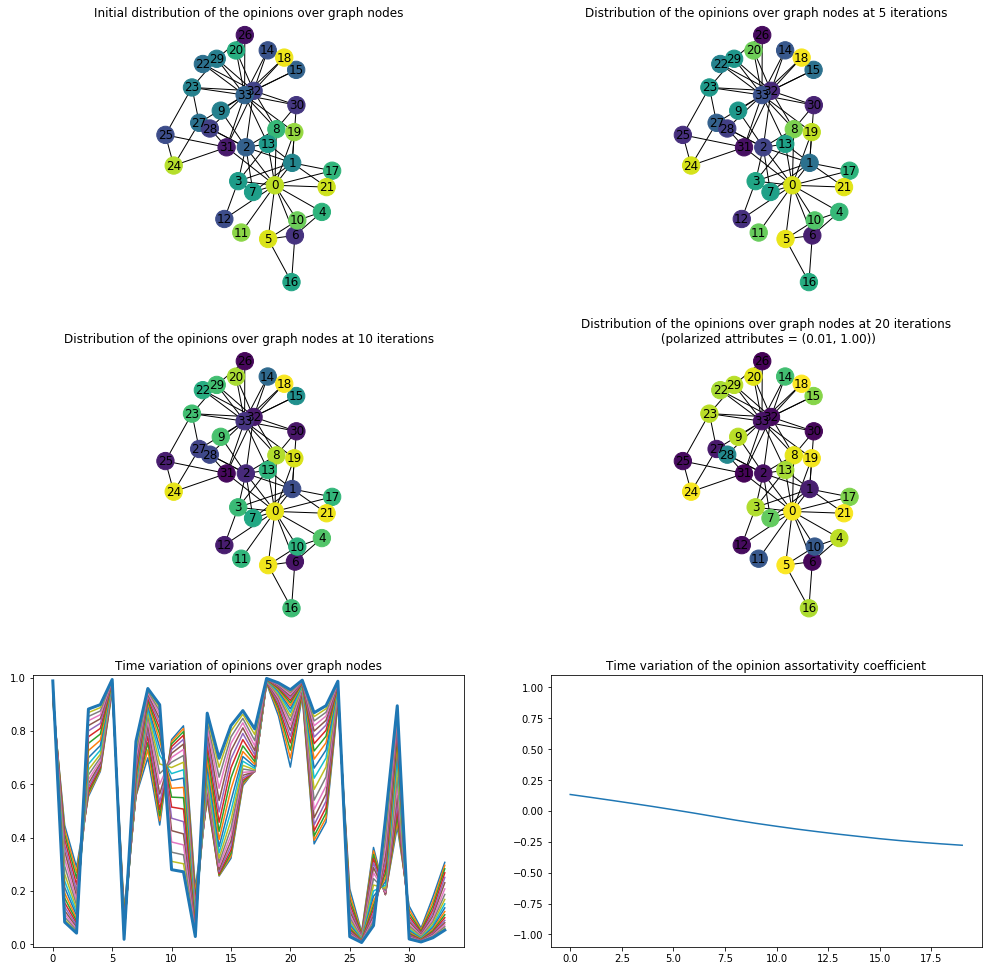

In [14]:
# Experiment B8: INFLUENCE 
# CONTRARIAN INFLUENCE 

# Susceptibility of all nodes (low)
sa = 0.1
G=G
pos=pos
polinfluence_sim(G,pos,sa,iterations)

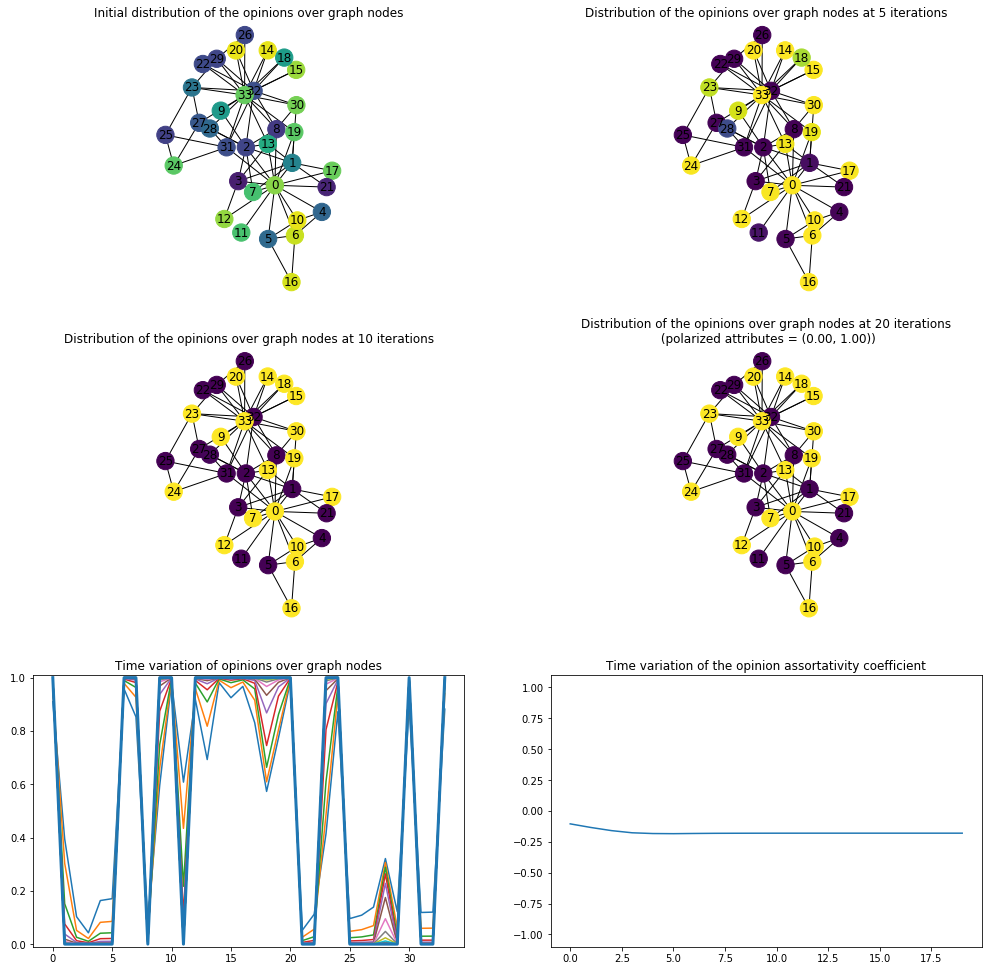

In [15]:
# Experiment B9: INFLUENCE 
# CONTRARIAN INFLUENCE 

# Susceptibility of all nodes (medium)
sa = 0.5
G=G
pos=pos
polinfluence_sim(G,pos,sa,iterations)

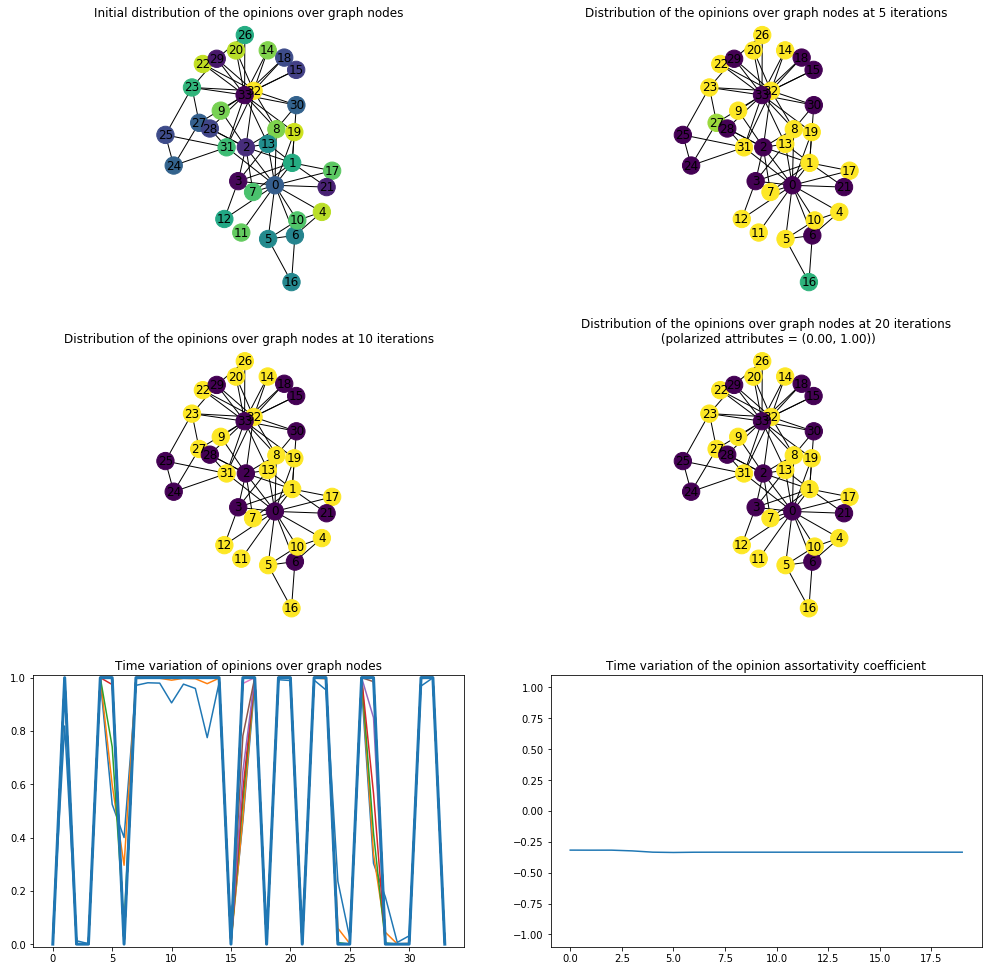

In [16]:
# Experiment B10: INFLUENCE 
# CONTRARIAN INFLUENCE 

# Susceptibility of all nodes (high)
sa = 0.9
G=G
pos=pos
polinfluence_sim(G,pos,sa,iterations)

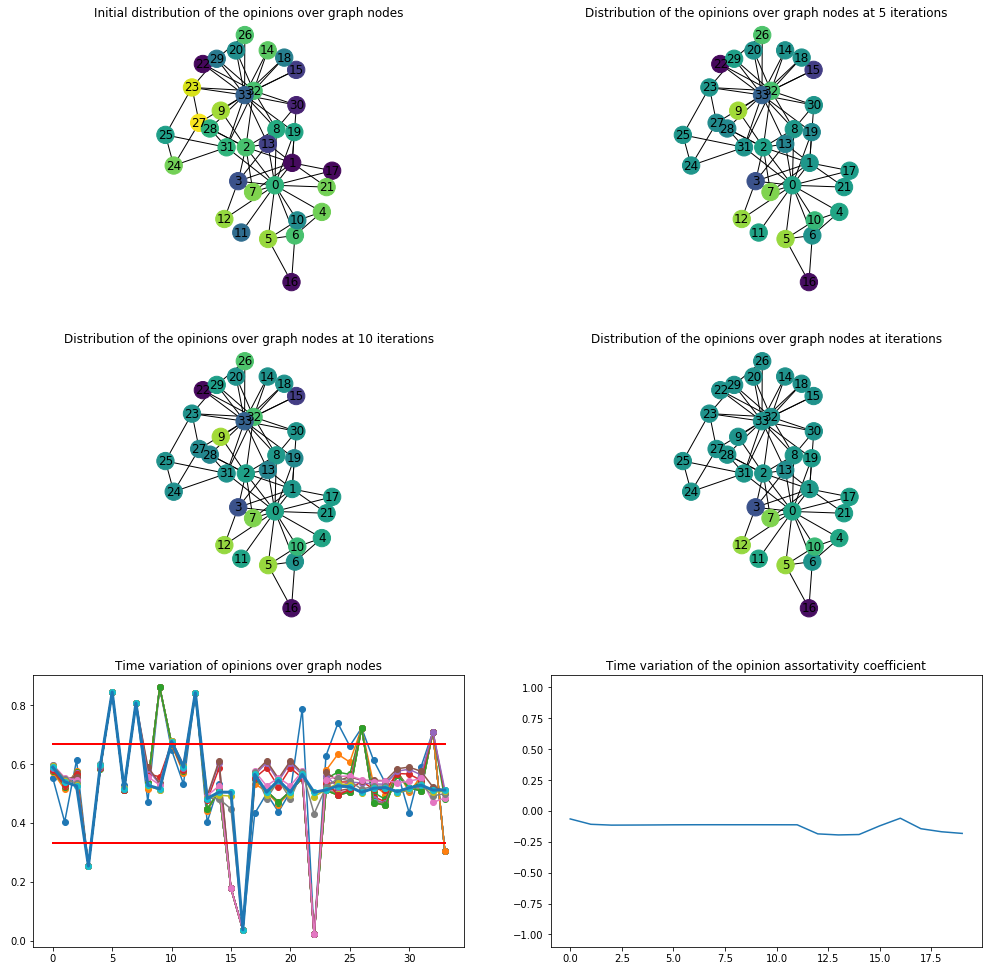

In [17]:
# Experiment B11: INFLUENCE 
# SEGREGATED INFLUENCE: The interval of attributes [0,1] is divided in three zones:
# [0,1/3), the "left",
# [1/3, 2/3), the "center",
# [2/3,1], the "right".
# * Persons in either one of the three zones interact as in Experiment 1 as far as their neighbors' attributes
# lie in the same zone with them.
# * Otherwize, persons in the "left" interact only with persons in the "center left" [1/3,1/2],
# persons in the "right" interact only with persons in the "center right" [1/2,2/3], while persons in the
# "left" do not interact with persons in the "right."
# The outcome is that persons' attributes are stabilized in a multiplicity of heterogeneous positions in the
# interval of attributes, i.e., complete dissensus emerges.

# Susceptibility of all nodes (high)
sa1 = 0.9 # high susceptibility inside the "left" and the "right"
sa2 = 0.1 # low susceptibility among "left" and "center left" and among "right and center right".
G=G
pos=pos
cl_influence_sim(G,pos,sa1,sa2,iterations)